# 

価格は適正

今日、商品の価格を推定するためのより複雑なソリューションを構築しています。

1. Day2.0ノートブック：RAG-DB作成
2. Day2.1ノートブック：2Dで視覚化
3. Day2.2ノートブック：3Dで視覚化
4. Day2.3ノートブック：GPT-4o miniでRAGパイプラインを構築してテスト
5. Day2.4ノートブック：(a) ランダムフォレストプライザー (b)アンサンブルプライザーを作成

うーん！それは一日で乗り越えるのにたくさんのことです！

## ご注意ください：

私たちはすでに、独自のファインチューニングされたLLMを使用して非常に強力な製品推定器を持っています。  

ほとんどの人はそれに非常に満足するでしょう！これらの追加の手順を追加する主な理由は、RAGとエージェント・ワークフローで専門知識を深めることです。

In [1]:
# import

# 基本的な
import os
import re
import math
import json
import random
import pickle

# HF
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset

# RAG
import chromadb
from sentence_transformers import SentenceTransformer

# 可視化
import numpy as np
from tqdm import tqdm
from sklearn.manifold import TSNE
import plotly.graph_objects as go

In [2]:
# 完全なデータセット（最大400_000）の視覚化は楽しいが、
# PCをクラッシュさせるので、自身で件数を設定、10_000は安全

MAXIMUM_DATAPOINTS = 30_000

In [3]:
DB = "products_vectorstore"
client = chromadb.PersistentClient(path=DB)

In [4]:
collection = client.get_or_create_collection('products')

In [5]:
# 8つのカテゴリと対応する色
CATEGORIES = ['Appliances', 'Automotive', 'Cell_Phones_and_Accessories', 'Electronics','Musical_Instruments', 'Office_Products', 'Tools_and_Home_Improvement', 'Toys_and_Games']
COLORS = ['red', 'blue', 'brown', 'orange', 'yellow', 'green' , 'purple', 'cyan']

In [6]:
# プレウォーク

# ChromaDBからデータ（埋込ベクトル / メタデータ）を指定件数分取得
#result = collection.get(include=['embeddings', 'documents', 'metadatas'], limit=MAXIMUM_DATAPOINTS)
result = collection.get(include=['embeddings', 'metadatas'], limit=MAXIMUM_DATAPOINTS)

# 埋込ベクトル / メタデータ → 色
vectors = np.array(result['embeddings'])
#documents = result['documents']
categories = [metadata['category'] for metadata in result['metadatas']]
colors = [COLORS[CATEGORIES.index(c)] for c in categories]

In [7]:
# ベクトルを2Dに次元削減

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
reduced_vectors = tsne.fit_transform(vectors)

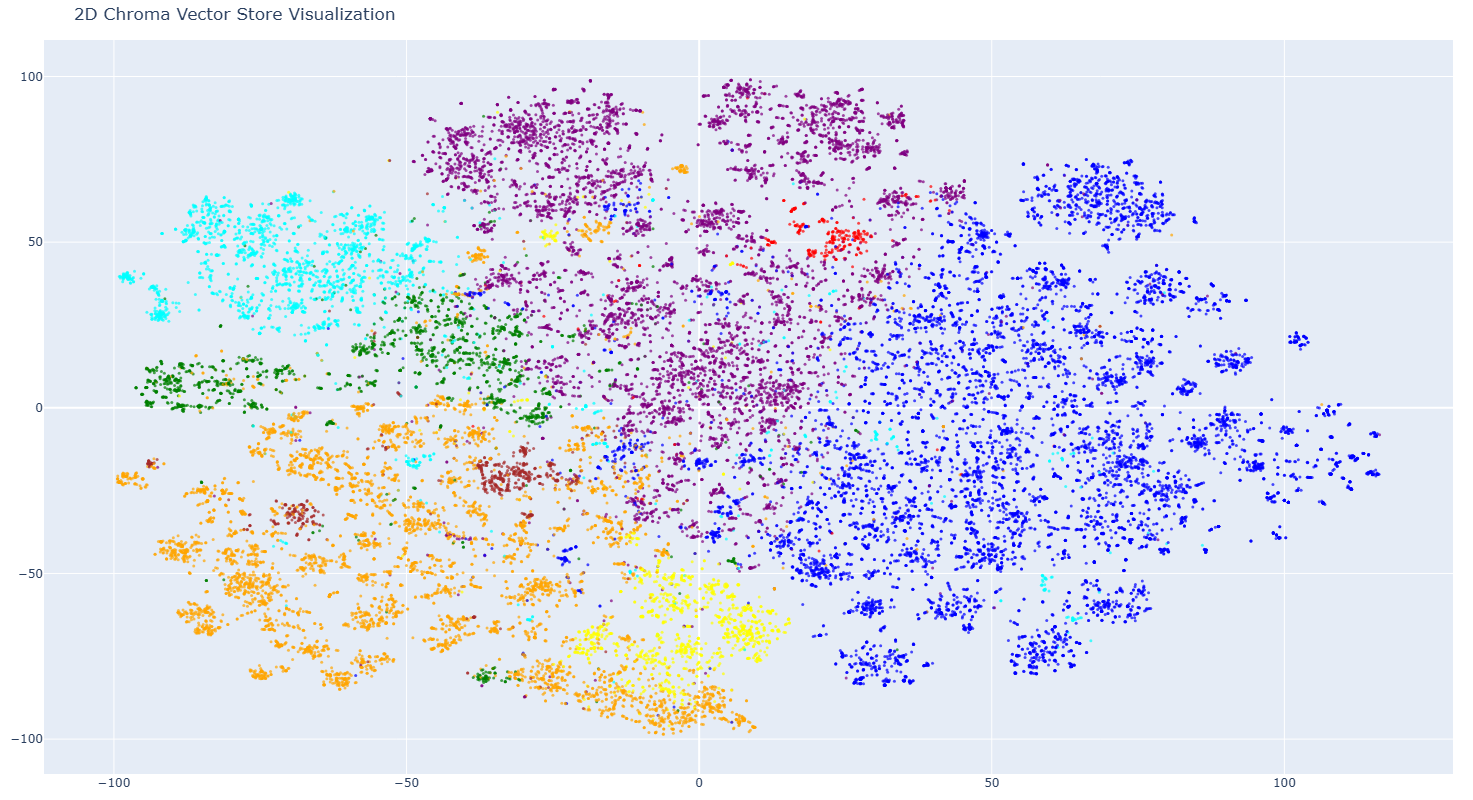

In [8]:
# 2D散布図を作成
fig = go.Figure(data=[go.Scatter(
    x=reduced_vectors[:, 0],
    y=reduced_vectors[:, 1],
    
    mode='markers',
    marker=dict(size=3, color=colors, opacity=0.7),
)])

fig.update_layout(
    title='2D Chroma Vector Store Visualization',
    scene=dict(xaxis_title='x', yaxis_title='y'),
    width=1200,
    height=800,
    margin=dict(r=20, b=10, l=10, t=40)
)

fig.show()